In [ ]:
#Neural network in python

In [ ]:
class myNN:
  def __init__(self):
     self.wl = 1
     self.w2 = 1
     self.bias = 0

  def fit(self, x, y, epochs, loss_thresold):
    self.w1, self.w2, self.bias = self.gradient_descent(x['age'], x['affordibility'], y, epochs, loss_thresold)


  def predict(self, x_test):
    weighted_sum = self.w1*x_test['age'] + self.w2*x_test['affordibility'] + self.bias
    return sigmoid_numpy(weighted_sum)

  def gradient_descent(self, age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        if i%50==0:
          print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [ ]:
customModel = myNN()
customModel.fit(x_trained_scaled, y_train, epochs=500, loss_thresold=0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572745, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006


In [ ]:
customModel.predict(x_test)

,0
2,1.0
10,1.0
21,1.0
11,1.0
14,1.0
9,1.0


In [ ]:
coef, intercepts

(array([[0.7785072 ],
        [0.69779867]], dtype=float32),
 array([-0.39703578], dtype=float32))

In [ ]:
customModel.predict(x_test_scaled)

,0
2,0.705020
10,0.355836
21,0.161599
11,0.477919
14,0.725586
9,0.828987


In [ ]:
#Chain Rule

In [1]:
#GPU

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [9]:
x_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
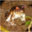

In [10]:
x_train[0]

In [11]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
def plot_sample(index):
  plt.figure(figsize=(15,2))
  plt.imshow(x_train[index])

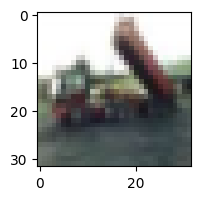

In [15]:
plot_sample(2)

In [16]:
x_trained_scaled = x_train/255
x_test_scaled = x_test/255

In [17]:
x_trained_scaled.shape

(50000, 32, 32, 3)

In [20]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [23]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


model.fit(x_trained_scaled, y_train_categorical, epochs=50)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3011 - loss: 1.9408
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4189 - loss: 1.6466
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4502 - loss: 1.5572
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4726 - loss: 1.4926
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4933 - loss: 1.4379
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5086 - loss: 1.3966
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5220 - loss: 1.3618
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5327 - loss: 1.3240
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5502 - loss: 1.2844
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5558 - loss: 1.2567
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5749 - loss: 1.2172
Epoch 12/50
1563/1563 ━━━━━

In [35]:
classes[np.argmax(model.predict(x_test_scaled)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'ship'

In [36]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[y_test[1][0]]

'ship'

In [37]:
model.evaluate(x_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5693 - loss: 1.5904


[1.5818586349487305, 0.5651000142097473]

In [38]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])
  model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
  return model

In [40]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_trained_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.3079 - loss: 1.9286
2min 3s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [41]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_trained_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3080 - loss: 1.9337
14.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
